# Telecom Churn 

## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Goals and Objective
- Define high-value customers and predict churn only on high-value customers
- Build models to predict churn. The predictive model will serve two purposes:
1) It will be used to predict whether a high-value customer will churn or not, in near future 
2) identify important variables that are strong predictors of churn

### Importing Necessary Libaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings;warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 300)

### Data cleaning and preprocessing

In [2]:
df = pd.read_csv("telecom_churn_data.csv")
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
df.shape

(99999, 226)

In [4]:
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [5]:
# checking null values greater than 40%
high_null = df.isna().mean()*100 > 40  
high_null

mobile_number     False
circle_id         False
loc_og_t2o_mou    False
std_og_t2o_mou    False
loc_ic_t2o_mou    False
                  ...  
aon               False
aug_vbc_3g        False
jul_vbc_3g        False
jun_vbc_3g        False
sep_vbc_3g        False
Length: 226, dtype: bool

In [6]:
#columns having null value greater than 40%
drop_columns = df.columns[high_null]
drop_columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [7]:
# dropping columns where null values are greater than 40%
df.drop(columns = drop_columns,axis = 1,inplace =True)

In [8]:
df.shape

(99999, 186)

#### Segmenating the data to get 6,7,8,9 months data for further analysis

In [9]:
six_month_df = df.loc[:,df.columns.str.contains("6")]
six_month_df

last_date_of_month_6   arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  \
0                6/30/2014  197.385          NaN           NaN            NaN   
1                6/30/2014   34.047        24.11         15.74            0.0   
2                6/30/2014  167.690        11.54        143.33            0.0   
3                6/30/2014  221.338        99.91        123.31            0.0   
4                6/30/2014  261.636        50.31         76.96            0.0   
...                    ...      ...          ...           ...            ...   
99994            6/30/2014   18.471         5.40         15.19            0.0   
99995            6/30/2014  112.201        29.26        100.83            0.0   
99996            6/30/2014  229.187         1.11         21.04            0.0   
99997            6/30/2014  322.991         0.00          0.00            0.0   
99998            6/30/2014  687.065        84.34        166.46            0.0   

       roam_og_mou_6  loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
0                NaN               NaN               NaN               NaN   
1                0.0             23.88             11.51              0.00   
2                0.0              7.19             29.34             24.11   
3                0.0             73.68            107.43              1.91   
4                0.0             50.31             67.64              0.00   
...              ...               ...               ...               ...   
99994            0.0              5.40             12.78              0.00   
99995            0.0             28.93             91.34              1.71   
99996            0.0              1.11             13.33              0.00   
99997            0.0              0.00              0.00              0.00   
99998            0.0             84.34            166.46              0.00   

       loc_og_t2c_mou_6  loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  \
0                   NaN           NaN               NaN               NaN   
1                  0.00         35.39              0.23              0.00   
2                  0.00         60.66              4.34             41.81   
3                  0.00        183.03             26.23              2.99   
4                  0.00        117.96              0.00              9.31   
...                 ...           ...               ...               ...   
99994              0.00         18.18              0.00              0.00   
99995              0.00        121.99              0.33              4.83   
99996              4.71         14.44              0.00              0.00   
99997              0.00          0.00              0.00              0.00   
99998              0.00        250.81              0.00              0.00   

       std_og_t2f_mou_6  std_og_t2c_mou_6  std_og_mou_6  isd_og_mou_6  \
0                   NaN               NaN           NaN           NaN   
1                  0.00               0.0          0.23          0.00   
2                  1.48               0.0         47.64          0.00   
3                  0.00               0.0         29.23          0.00   
4                  0.00               0.0          9.31          0.00   
...                 ...               ...           ...           ...   
99994              0.00               0.0          0.00          0.00   
99995              2.93               0.0          8.09          0.00   
99996              0.00               0.0          0.00          0.00   
99997              0.00               0.0          0.00          0.00   
99998              0.00               0.0          0.00         17.36   

       spl_og_mou_6  og_others_6  total_og_mou_6  loc_ic_t2t_mou_6  \
0               NaN          NaN            0.00               NaN   
1              4.68         0.00           40.31              1.61   
2             46.56         0.45          155.33            115.69   
3             

In [10]:
seventh_month_df = df.loc[:,df.columns.str.contains("7")]
seventh_month_df

last_date_of_month_7   arpu_7  onnet_mou_7  offnet_mou_7  roam_ic_mou_7  \
0                7/31/2014  214.816          NaN           NaN            NaN   
1                7/31/2014  355.074        78.68         99.84           0.00   
2                7/31/2014  189.058        55.24        220.59           0.00   
3                7/31/2014  251.102        54.39        109.01          54.86   
4                7/31/2014  309.876       149.44         91.88           0.00   
...                    ...      ...          ...           ...            ...   
99994            7/31/2014   69.161         3.36         54.46           0.00   
99995            7/31/2014   77.811        18.13         69.01           0.00   
99996            7/31/2014    0.000          NaN           NaN            NaN   
99997            7/31/2014  303.386         0.00          0.00           0.00   
99998            7/31/2014    0.000          NaN           NaN            NaN   

       roam_og_mou_7  loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  \
0                NaN               NaN               NaN               NaN   
1               0.00             74.56             75.94              0.00   
2               0.00             28.74             16.86             21.79   
3              28.09             34.81             83.21              0.65   
4               0.00            149.44             91.88              0.00   
...              ...               ...               ...               ...   
99994           0.00              3.36             54.46              0.00   
99995           0.00             18.13             47.53              9.81   
99996            NaN               NaN               NaN               NaN   
99997           0.00              0.00              0.00              0.00   
99998            NaN               NaN               NaN               NaN   

       loc_og_t2c_mou_7  loc_og_mou_7  std_og_t2t_mou_7  std_og_t2m_mou_7  \
0                   NaN           NaN               NaN               NaN   
1                  2.91        150.51              4.11              0.46   
2                135.54         67.41             26.49             67.41   
3                  0.00        118.68             14.89              1.73   
4                  0.00        241.33              0.00              0.00   
...                 ...           ...               ...               ...   
99994              0.00         57.83              0.00              0.00   
99995              0.00         75.48              0.00              6.84   
99996               NaN           NaN               NaN               NaN   
99997              0.00          0.00              0.00              0.00   
99998               NaN           NaN               NaN               NaN   

       std_og_t2f_mou_7  std_og_t2c_mou_7  std_og_mou_7  isd_og_mou_7  \
0                   NaN               NaN           NaN           NaN   
1                  0.00               0.0          4.58           0.0   
2                 14.76               0.0        108.68           0.0   
3                  0.00               0.0         16.63           0.0   
4                  0.00               0.0          0.00           0.0   
...                 ...               ...           ...           ...   
99994              0.00               0.0          0.00           0.0   
99995              4.81               0.0         11.66           0.0   
99996               NaN               NaN           NaN           NaN   
99997              0.00               0.0          0.00           0.0   
99998               NaN               NaN           NaN           NaN   

       spl_og_mou_7  og_others_7  total_og_mou_7  loc_ic_t2t_mou_7  \
0               NaN          NaN            0.00               NaN   
1             23.43          0.0          178.53             29.91   
2            236.84          0.0          412.94             71.11   
3             

In [11]:
eight_month_df = df.loc[:,df.columns.str.contains("8")]
eight_month_df

last_date_of_month_8   arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0                8/31/2014  213.803         0.00          0.00           0.00   
1                8/31/2014  268.321         7.68        304.76           0.00   
2                8/31/2014  210.226        37.26        208.36           0.00   
3                8/31/2014  508.054       310.98         71.68          44.38   
4                8/31/2014  238.174        83.89        124.26           0.00   
...                    ...      ...          ...           ...            ...   
99994            8/31/2014   57.530         5.91         52.79           0.00   
99995            8/31/2014   79.081        16.06         66.39           0.00   
99996            8/31/2014    0.000          NaN           NaN            NaN   
99997            8/31/2014  606.817         0.00          0.00           0.00   
99998            8/31/2014    0.000          NaN           NaN            NaN   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
1               0.00              7.68            291.86              0.00   
2               0.00             13.58             38.46             15.61   
3              39.04             10.61             22.46              4.91   
4               0.00             83.89            124.26              0.00   
...              ...               ...               ...               ...   
99994           0.00              5.91             49.58              0.00   
99995           0.00             16.06             57.51              5.83   
99996            NaN               NaN               NaN               NaN   
99997           0.00              0.00              0.00              0.00   
99998            NaN               NaN               NaN               NaN   

       loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
0                  0.00          0.00              0.00              0.00   
1                  0.00        299.54              0.00              0.13   
2                 45.76         67.66             22.58             75.53   
3                  0.00         37.99            289.58              6.53   
4                  0.00        208.16              0.00              0.00   
...                 ...           ...               ...               ...   
99994              3.21         55.49              0.00              0.00   
99995              0.00         79.41              0.00              0.00   
99996               NaN           NaN               NaN               NaN   
99997              0.00          0.00              0.00              0.00   
99998               NaN           NaN               NaN               NaN   

       std_og_t2f_mou_8  std_og_t2c_mou_8  std_og_mou_8  isd_og_mou_8  \
0                  0.00               0.0          0.00           0.0   
1                  0.00               0.0          0.13           0.0   
2                 22.83               0.0        120.94           0.0   
3                  0.00               0.0        296.11           0.0   
4                  0.00               0.0          0.00           0.0   
...                 ...               ...           ...           ...   
99994              0.00               0.0          0.00           0.0   
99995              0.00               0.0          0.00           0.0   
99996               NaN               NaN           NaN           NaN   
99997              0.00               0.0          0.00           0.0   
99998               NaN               NaN           NaN           NaN   

       spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0              0.00          0.0            0.00              0.16   
1             12.76          0.0          312.44             29.23   
2             96.84          0.0          285.46             67.46   
3             

In [12]:
ninth_month_df = df.loc[:,df.columns.str.contains("9")]
ninth_month_df

last_date_of_month_9   arpu_9  onnet_mou_9  offnet_mou_9  roam_ic_mou_9  \
0                9/30/2014   21.100          NaN           NaN            NaN   
1                9/30/2014   86.285        18.34         53.76           0.00   
2                9/30/2014  290.714        74.81        118.91          38.49   
3                9/30/2014  389.500       241.71        113.54           0.00   
4                9/30/2014  163.426        58.78         45.81           0.00   
...                    ...      ...          ...           ...            ...   
99994            9/30/2014   29.950         0.00         27.14           0.00   
99995            9/30/2014  140.835        49.49         56.13           0.95   
99996            9/30/2014    0.000          NaN           NaN            NaN   
99997            9/30/2014  731.010         0.00          0.00           0.00   
99998            9/30/2014    0.000          NaN           NaN            NaN   

       roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  \
0                NaN               NaN               NaN               NaN   
1               0.00             18.34             53.76              0.00   
2              70.94             14.39             28.16             22.24   
3               0.00             15.49             65.46              2.06   
4               0.00             58.78             37.89              1.93   
...              ...               ...               ...               ...   
99994           0.00              0.00             24.78              2.25   
99995           4.23             49.49             46.71              3.28   
99996            NaN               NaN               NaN               NaN   
99997           0.00              0.00              0.00              0.00   
99998            NaN               NaN               NaN               NaN   

       loc_og_t2c_mou_9  loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  \
0                   NaN           NaN               NaN               NaN   
1                  0.00         72.11              0.00              0.00   
2                  0.48         64.81              8.76              9.28   
3                  0.00         83.03            226.21              9.99   
4                  0.00         98.61              0.00              0.00   
...                 ...           ...               ...               ...   
99994              0.11         27.03              0.00              0.00   
99995              0.00         99.49              0.00              1.90   
99996               NaN           NaN               NaN               NaN   
99997              0.00          0.00              0.00              0.00   
99998               NaN           NaN               NaN               NaN   

       std_og_t2f_mou_9  std_og_t2c_mou_9  std_og_mou_9  isd_og_mou_9  \
0                   NaN               NaN           NaN           NaN   
1                   0.0               0.0          0.00           0.0   
2                   0.0               0.0         18.04           0.0   
3                   0.0               0.0        236.21           0.0   
4                   0.0               0.0          0.00           0.0   
...                 ...               ...           ...           ...   
99994               0.0               0.0          0.00           0.0   
99995               0.0               0.0          1.90           0.0   
99996               NaN               NaN           NaN           NaN   
99997               0.0               0.0          0.00           0.0   
99998               NaN               NaN           NaN           NaN   

       spl_og_mou_9  og_others_9  total_og_mou_9  loc_ic_t2t_mou_9  \
0               NaN          NaN            0.00               NaN   
1              0.00          0.0           72.11            116.09   
2             42.08          0.0          124.94            148.23   
3             

### EDA -Univariate Analysis of 6,7,8 month

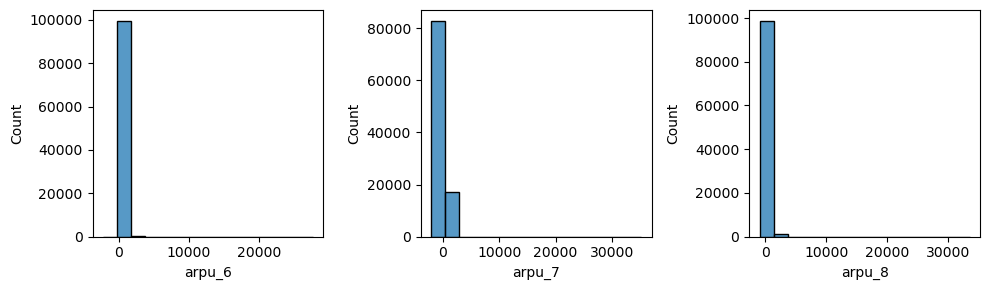

In [13]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "arpu_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "arpu_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "arpu_8",bins = 15)
plt.tight_layout()

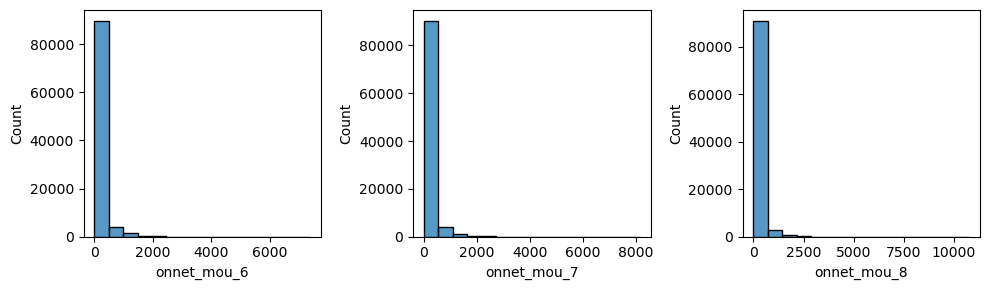

In [14]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "onnet_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "onnet_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "onnet_mou_8",bins = 15)
plt.tight_layout()

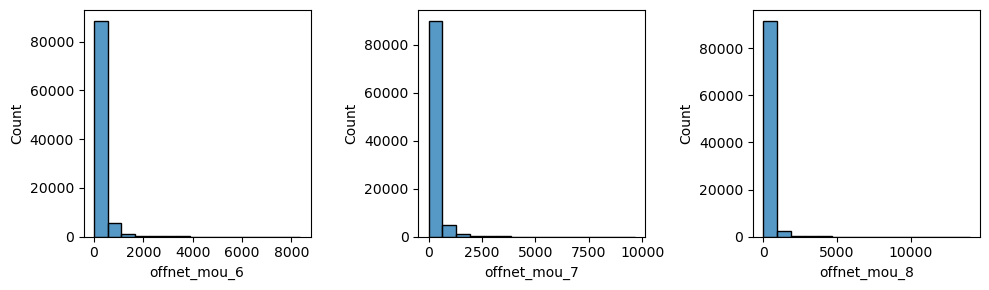

In [15]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "offnet_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "offnet_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "offnet_mou_8",bins = 15)
plt.tight_layout()

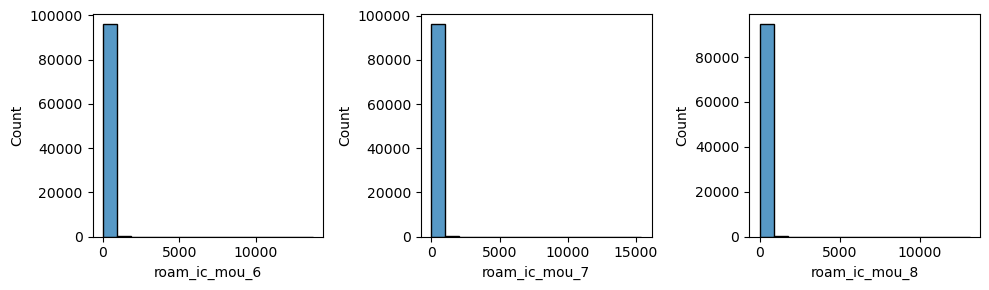

In [16]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "roam_ic_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "roam_ic_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "roam_ic_mou_8",bins = 15)
plt.tight_layout()

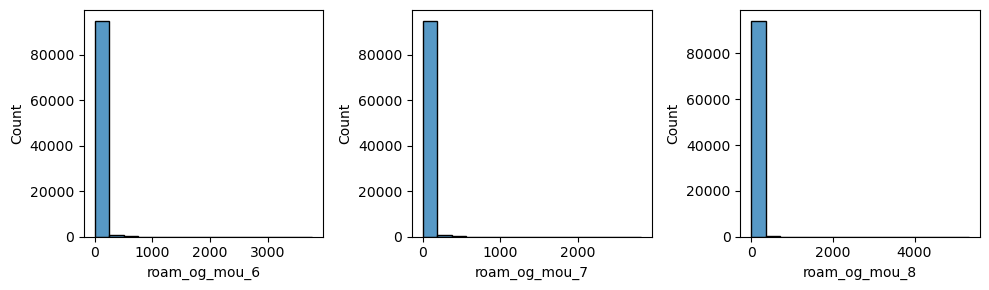

In [17]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "roam_og_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "roam_og_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "roam_og_mou_8",bins = 15)
plt.tight_layout()

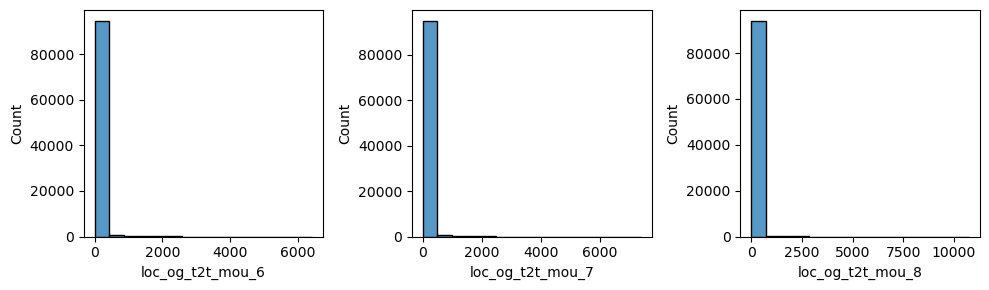

In [18]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "loc_og_t2t_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "loc_og_t2t_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "loc_og_t2t_mou_8",bins = 15)
plt.tight_layout()

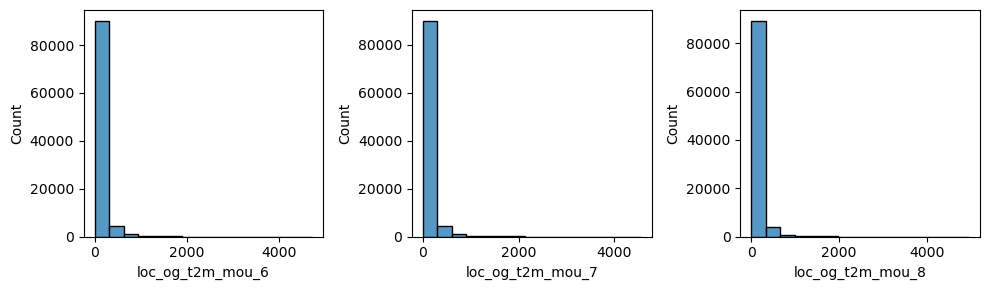

In [19]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "loc_og_t2m_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "loc_og_t2m_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "loc_og_t2m_mou_8",bins = 15)
plt.tight_layout()

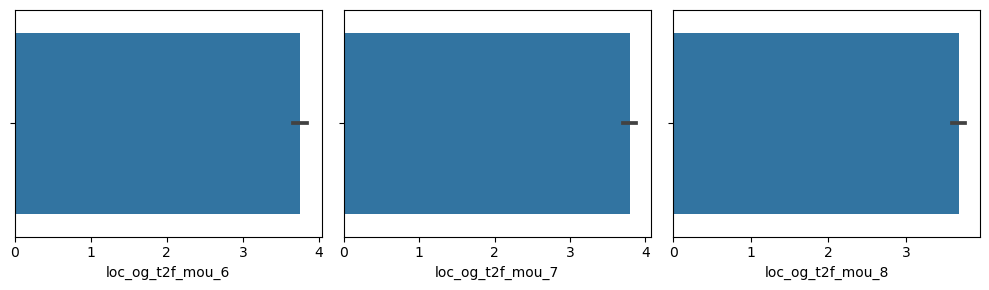

In [20]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.barplot(data = six_month_df,x = "loc_og_t2f_mou_6")
plt.subplot(1,3,2)
sns.barplot(data = seventh_month_df,x = "loc_og_t2f_mou_7")
plt.subplot(1,3,3)
sns.barplot(data = eight_month_df,x = "loc_og_t2f_mou_8")
plt.tight_layout()

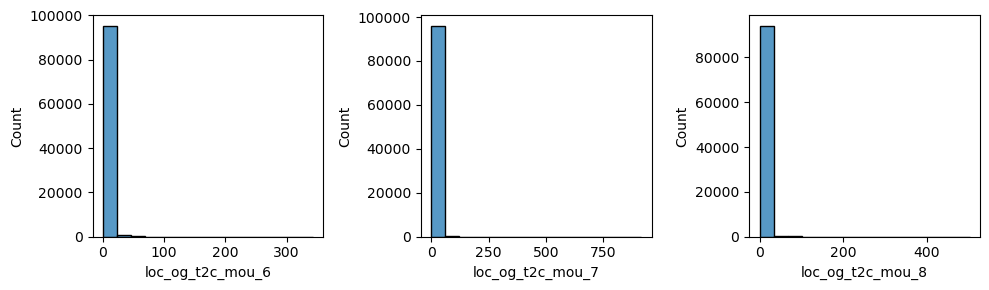

In [21]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "loc_og_t2c_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "loc_og_t2c_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "loc_og_t2c_mou_8",bins = 15)
plt.tight_layout()

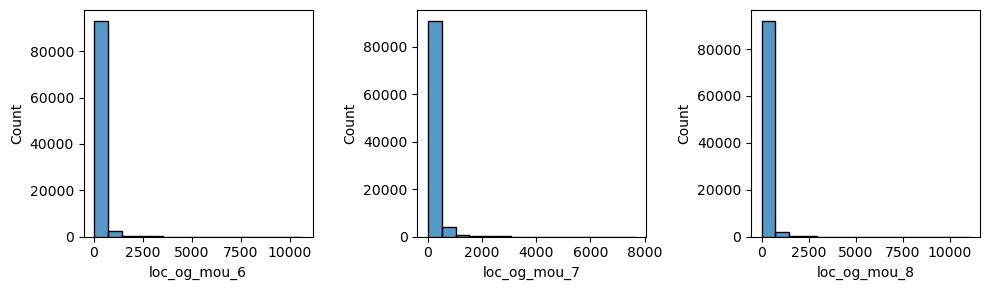

In [22]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "loc_og_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "loc_og_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "loc_og_mou_8",bins = 15)
plt.tight_layout()

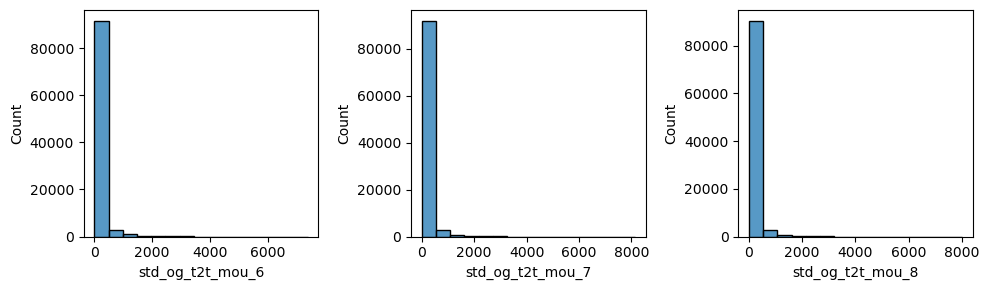

In [23]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "std_og_t2t_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "std_og_t2t_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "std_og_t2t_mou_8",bins = 15)
plt.tight_layout()

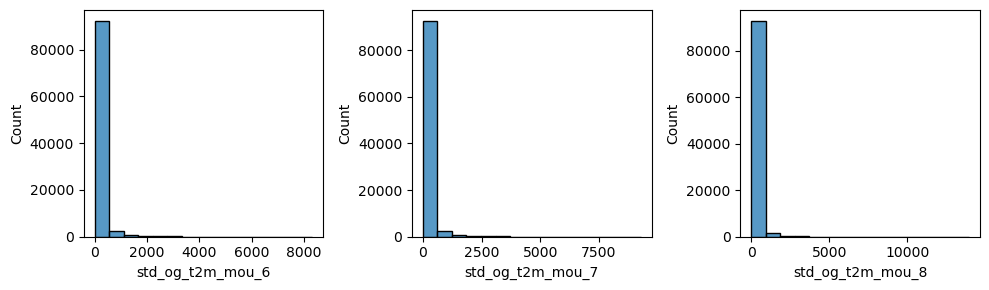

In [24]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "std_og_t2m_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "std_og_t2m_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "std_og_t2m_mou_8",bins = 15)
plt.tight_layout()

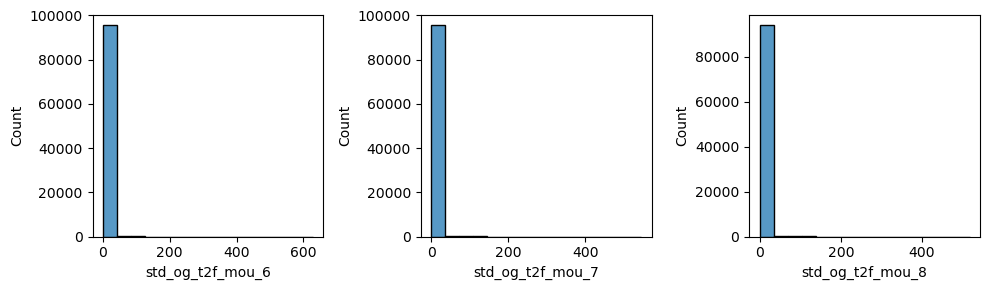

In [25]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "std_og_t2f_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "std_og_t2f_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "std_og_t2f_mou_8",bins = 15)
plt.tight_layout()

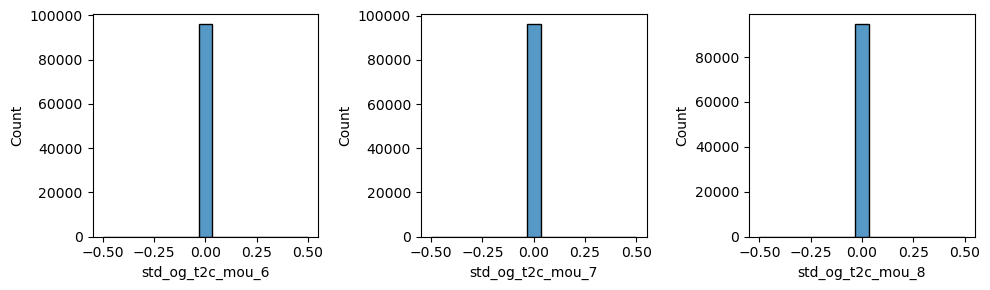

In [26]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "std_og_t2c_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "std_og_t2c_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "std_og_t2c_mou_8",bins = 15)
plt.tight_layout()

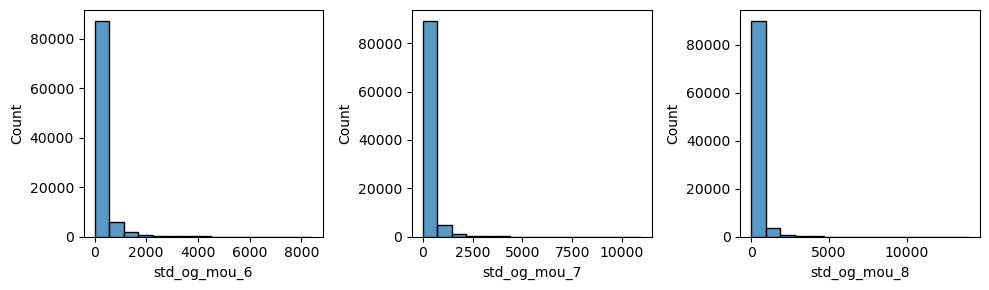

In [27]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "std_og_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "std_og_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "std_og_mou_8",bins = 15)
plt.tight_layout()

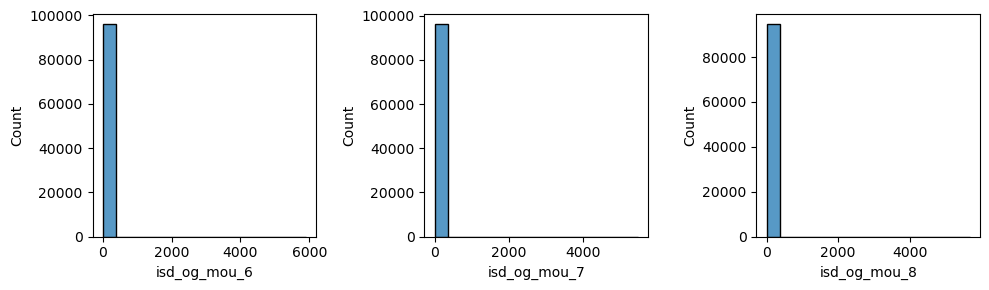

In [28]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "isd_og_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "isd_og_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "isd_og_mou_8",bins = 15)
plt.tight_layout()

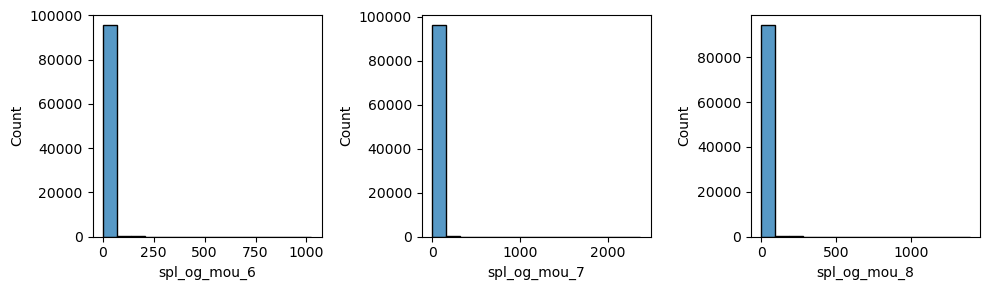

In [29]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "spl_og_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "spl_og_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "spl_og_mou_8",bins = 15)
plt.tight_layout()

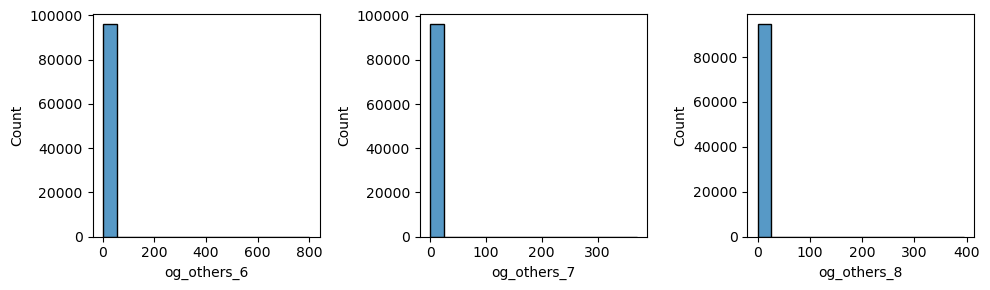

In [30]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "og_others_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "og_others_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "og_others_8",bins = 15)
plt.tight_layout()

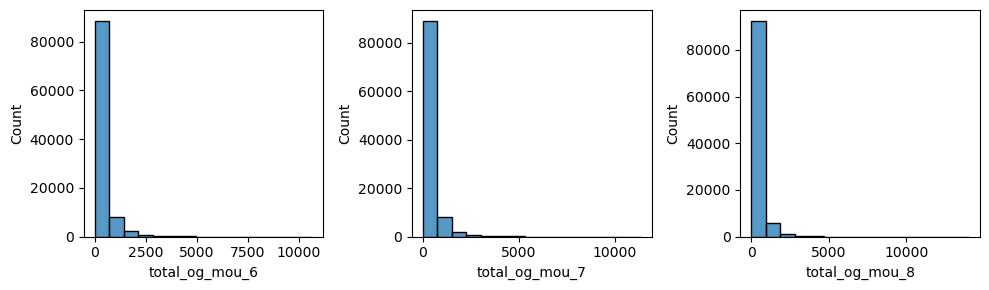

In [31]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "total_og_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "total_og_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "total_og_mou_8",bins = 15)
plt.tight_layout()

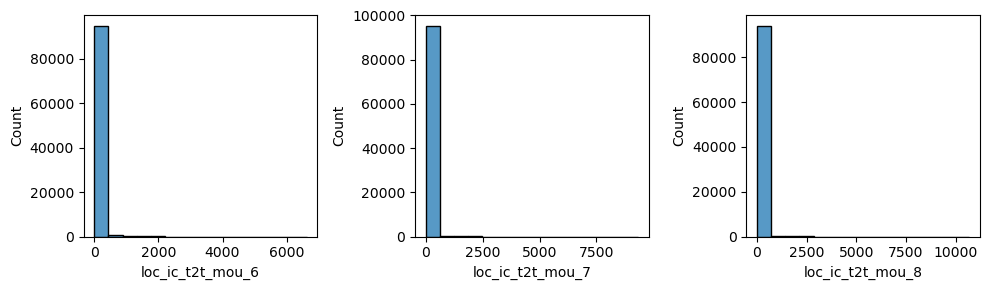

In [32]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "loc_ic_t2t_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "loc_ic_t2t_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "loc_ic_t2t_mou_8",bins = 15)
plt.tight_layout()

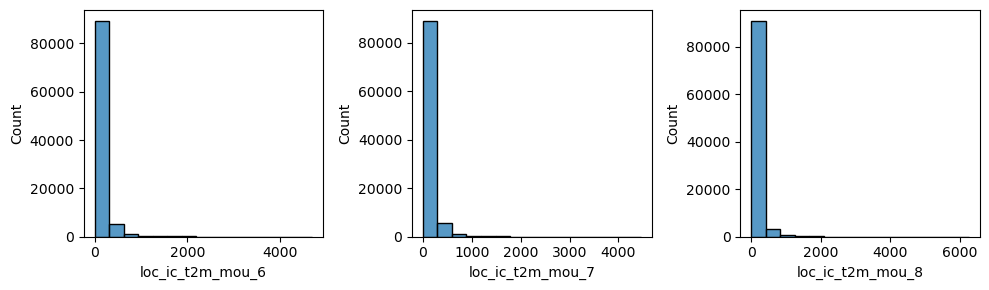

In [33]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "loc_ic_t2m_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "loc_ic_t2m_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "loc_ic_t2m_mou_8",bins = 15)
plt.tight_layout()

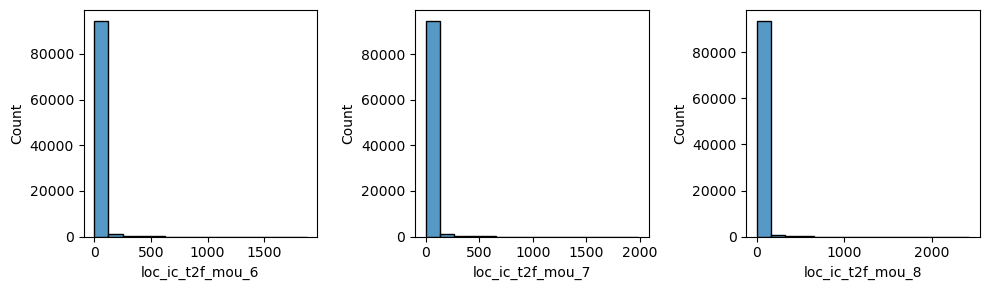

In [34]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "loc_ic_t2f_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "loc_ic_t2f_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "loc_ic_t2f_mou_8",bins = 15)
plt.tight_layout()

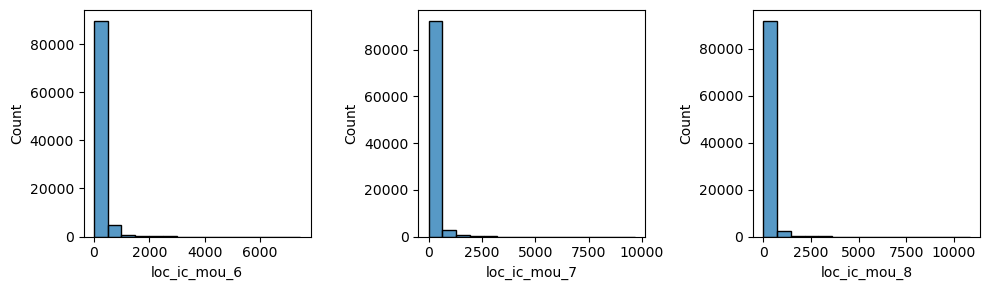

In [35]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "loc_ic_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "loc_ic_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "loc_ic_mou_8",bins = 15)
plt.tight_layout()

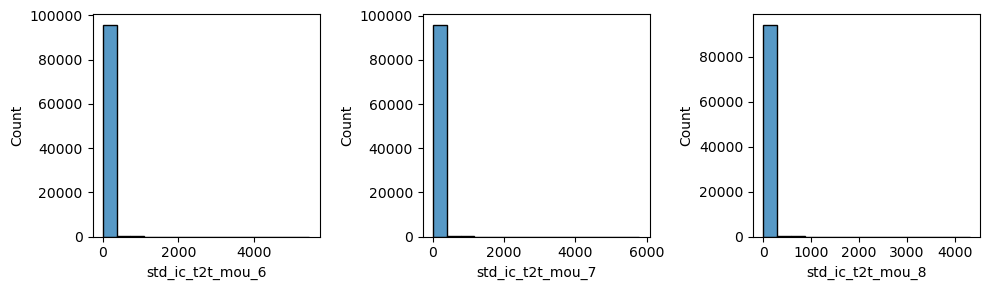

In [36]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "std_ic_t2t_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "std_ic_t2t_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "std_ic_t2t_mou_8",bins = 15)
plt.tight_layout()

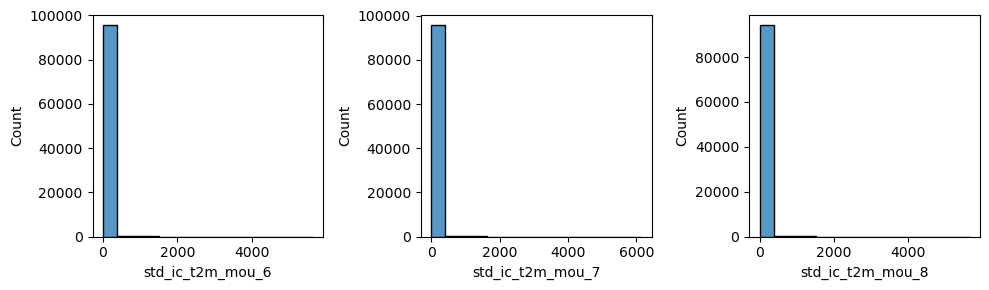

In [37]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "std_ic_t2m_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "std_ic_t2m_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "std_ic_t2m_mou_8",bins = 15)
plt.tight_layout()

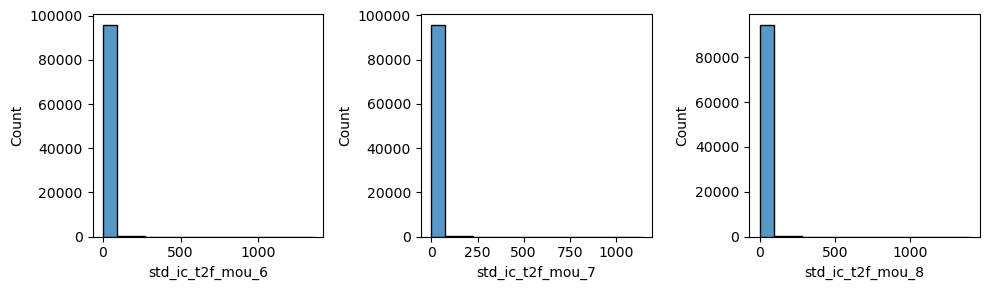

In [38]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "std_ic_t2f_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "std_ic_t2f_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "std_ic_t2f_mou_8",bins = 15)
plt.tight_layout()

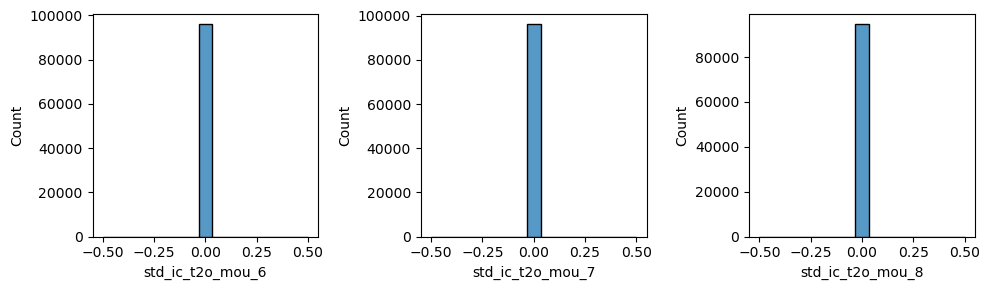

In [39]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "std_ic_t2o_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "std_ic_t2o_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "std_ic_t2o_mou_8",bins = 15)
plt.tight_layout()

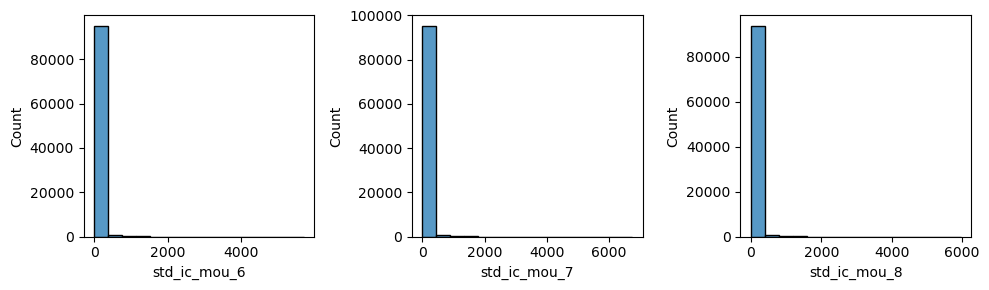

In [40]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "std_ic_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "std_ic_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "std_ic_mou_8",bins = 15)
plt.tight_layout()

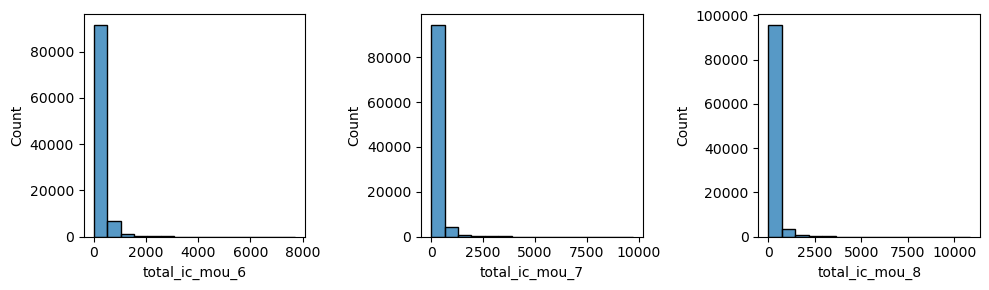

In [41]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "total_ic_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "total_ic_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "total_ic_mou_8",bins = 15)
plt.tight_layout()

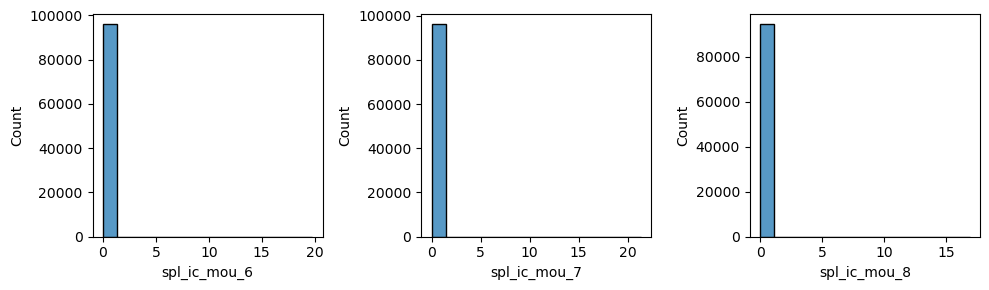

In [42]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "spl_ic_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "spl_ic_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "spl_ic_mou_8",bins = 15)
plt.tight_layout()

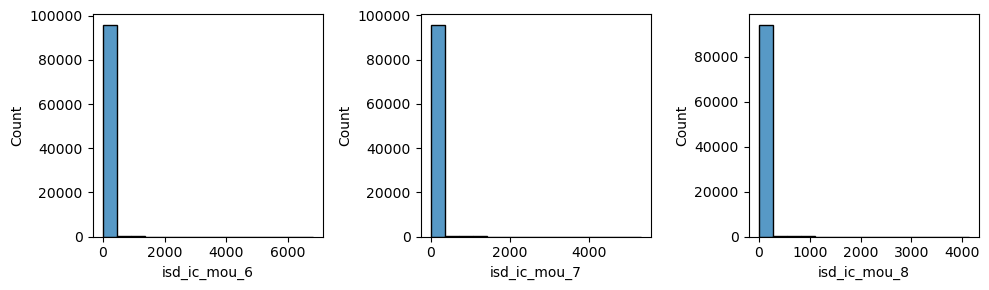

In [43]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "isd_ic_mou_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "isd_ic_mou_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "isd_ic_mou_8",bins = 15)
plt.tight_layout()

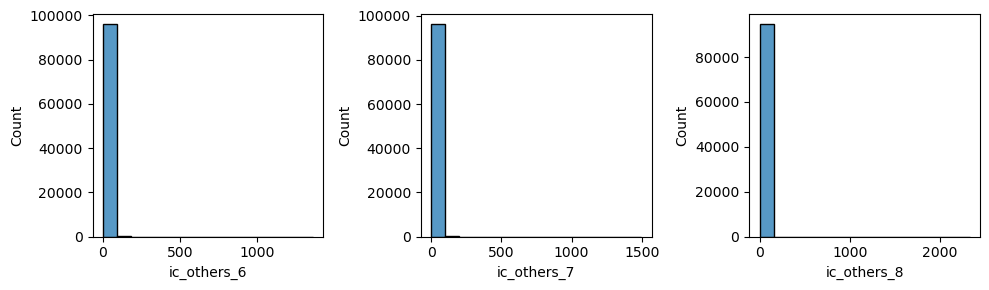

In [44]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "ic_others_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "ic_others_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "ic_others_8",bins = 15)
plt.tight_layout()

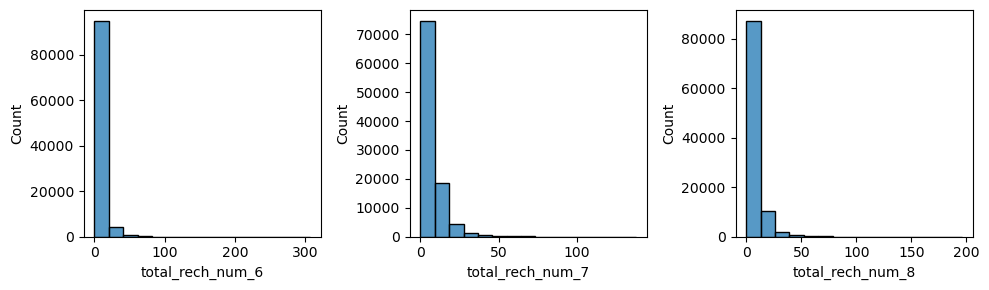

In [45]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "total_rech_num_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "total_rech_num_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "total_rech_num_8",bins = 15)
plt.tight_layout()

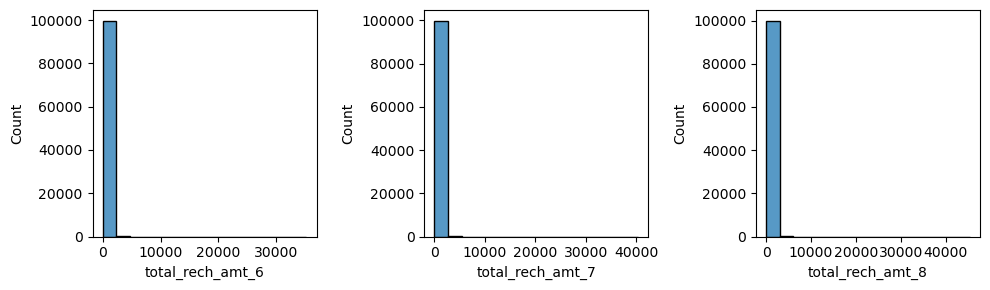

In [46]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "total_rech_amt_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "total_rech_amt_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "total_rech_amt_8",bins = 15)
plt.tight_layout()

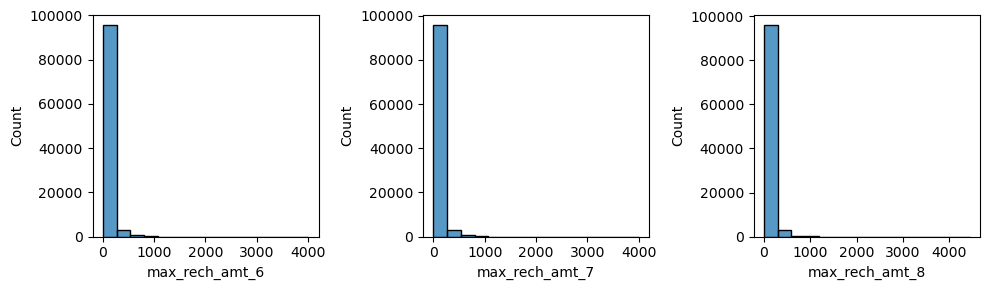

In [47]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "max_rech_amt_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "max_rech_amt_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "max_rech_amt_8",bins = 15)
plt.tight_layout()

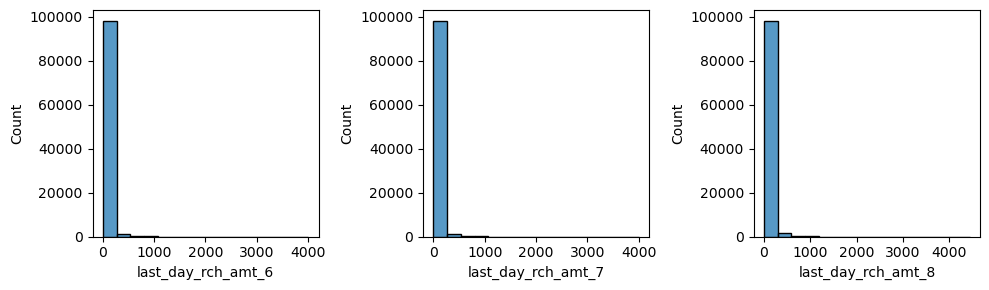

In [48]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "last_day_rch_amt_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "last_day_rch_amt_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "last_day_rch_amt_8",bins = 15)
plt.tight_layout()

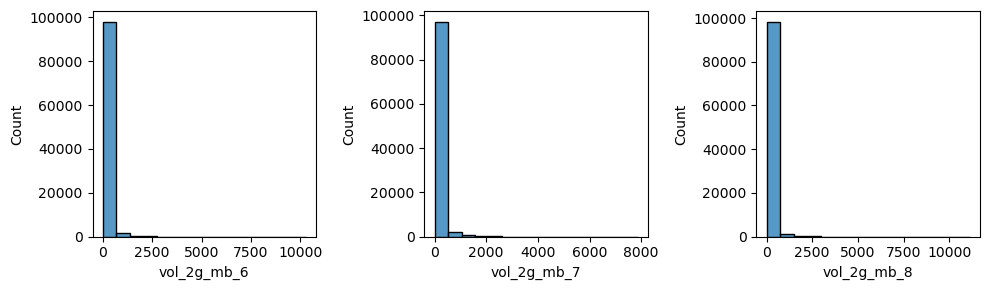

In [49]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "vol_2g_mb_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "vol_2g_mb_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "vol_2g_mb_8",bins = 15)
plt.tight_layout()

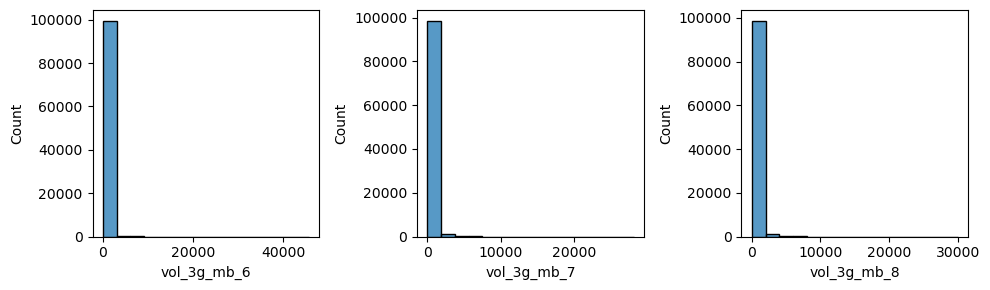

In [50]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "vol_3g_mb_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "vol_3g_mb_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "vol_3g_mb_8",bins = 15)
plt.tight_layout()

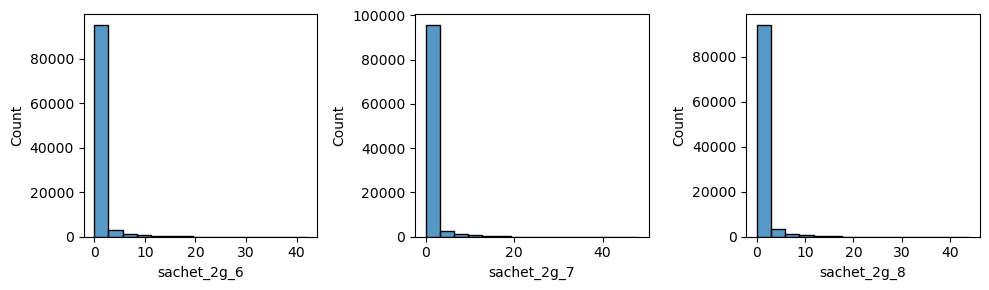

In [51]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "sachet_2g_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "sachet_2g_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "sachet_2g_8",bins = 15)
plt.tight_layout()

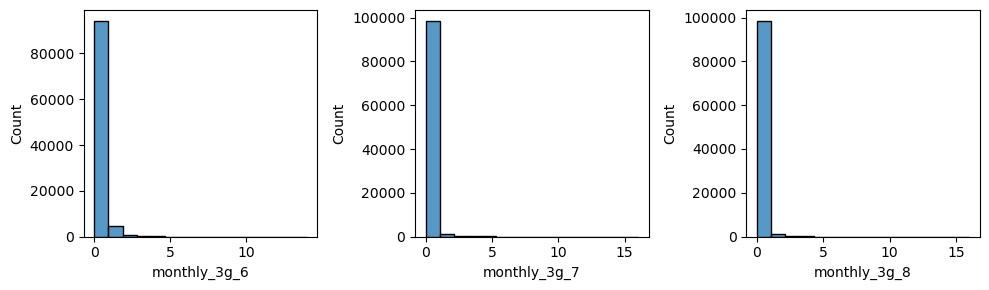

In [52]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "monthly_3g_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "monthly_3g_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "monthly_3g_8",bins = 15)
plt.tight_layout()

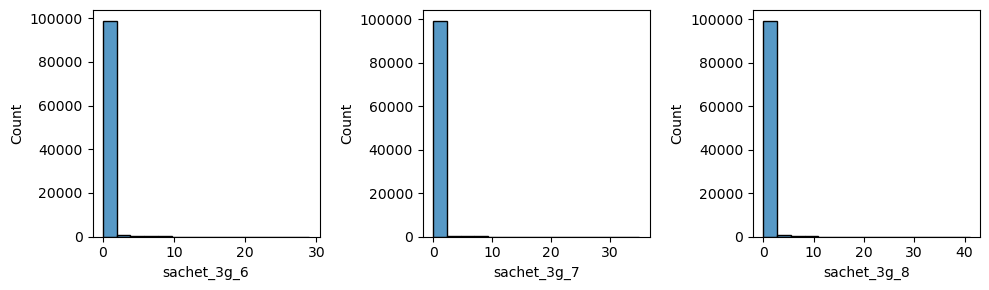

In [53]:
plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
sns.histplot(data = six_month_df,x = "sachet_3g_6",bins = 15)
plt.subplot(1,3,2)
sns.histplot(data = seventh_month_df,x = "sachet_3g_7",bins = 15)
plt.subplot(1,3,3)
sns.histplot(data = eight_month_df,x = "sachet_3g_8",bins = 15)
plt.tight_layout()

In [54]:
df

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/2014   
2                 0.0            6/30/2014            7/31/2014   
3                 0.0            6/30/2014            7/31/2014   
4                 0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0                8/31/2014            9/30/2014  197.385  214.816  213.803   
1                8/31/2014            9/30/2014   34.047  355.074  268.321   
2                8/31/2014            9/30/2014  167.690  189.058  210.226   
3                8/31/2014            9/30/2014  221.338  251.102  508.054   
4                8/31/2014            9/30/2014  261.636  309.876  238.174   
...                    ...                  ...      ...      ...      ...   
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
1       86.285        24.11        78.68         7.68        18.34   
2      290.714        11.54        55.24        37.26        74.81   
3      389.500        99.91        54.39       310.98       241.71   
4      163.426        50.31       149.44        83.89        58.78   
...        ...          ...          ...          ...          ...   
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
1             15.74         99.84        304.76         53.76            0.0   
2            143.33        220.59        208.36        118.91            0.0   
3            123.31        109.01         71.68        113.54            0.0   
4             76.96         91.88        124.26         45.81            0.0   
...             ...           ...           ...           ...            ...   
99994         15.19         54.46         52.79         27.

In [55]:
# dropping all date columns 
df.drop(["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9",
        "date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9"],axis = 1,inplace = True)

### Creating a function to fill missing values

In [56]:
def fillnull(df, feature_name):
    for i in feature_name:
        med = df[i].median()
        df[i].fillna(med, inplace=True)
    return df[feature_name]


In [57]:
# applying the function
fillnull(df,df.columns)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0                 0.0  197.385  214.816  213.803   21.100        34.31   
1                 0.0   34.047  355.074  268.321   86.285        24.11   
2                 0.0  167.690  189.058  210.226  290.714        11.54   
3                 0.0  221.338  251.102  508.054  389.500        99.91   
4                 0.0  261.636  309.876  238.174  163.426        50.31   
...               ...      ...      ...      ...      ...          ...   
99994             0.0   18.471   69.161   57.530   29.950         5.40   
99995             0.0  112.201   77.811   79.081  140.835        29.26   
99996             0.0  229.187    0.000    0.000    0.000         1.11   
99997             0.0  322.991  303.386  606.817  731.010         0.00   
99998             0.0  687.065    0.000    0.000    0.000        84.34   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0            32.33         0.00        29.84         96.31        91.735   
1            78.68         7.68        18.34         15.74        99.840   
2            55.24        37.26        74.81        143.33       220.590   
3            54.39       310.98       241.71        123.31       109.010   
4           149.44        83.89        58.78         76.96        91.880   
...            ...          ...          ...           ...           ...   
99994         3.36         5.91         0.00         15.19        54.460   
99995        18.13        16.06        49.49        100.83        69.010   
99996        32.33        32.36        29.84         21.04        91.735   
99997         0.00         0.00         0.00          0.00         0.000   
99998        32.33        32.36        29.84        166.46        91.735   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00         87.29            0.0           0.00   
1            304.76         53.76            0.0           0.00   
2            208.36        118.91            0.0           0.00   
3             71.68        113.54            0.0          54.86   
4            124.26         45.81            0.0           0.00   
...             ...           ...            ...            ...   
99994         52.79         27.14            0.0           0.00   
99995         66.39         56.13            0.0           0.00   
99996         92.14         87.29            0.0           0.00   
99997          0.00          0.00            0.0           0.00   
99998         92.14         87.29            0.0           0.00   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0               0.00           0.00            0.0           0.00   
1               0.00           0.00            0.0           0.00   
2               0.00          38.49            0.0           0.00   
3              44.38           0.00            0.0          28.09   
4               0.00           0.00            0.0           0.00   
...              ...            ...            ...            ...   
99994           0.00           0.00            0.0           0.00   
99995           0.00           0.95        

### Creating an new Target column churn

In [58]:
# creating new feature churn where 1 is churned and 0 is not churned
df["churn"] = np.where((df["total_ic_mou_9"] == 0) &
                       (df["total_og_mou_9"] == 0) &
                       (df["vol_2g_mb_9"] == 0) &
                       (df["vol_3g_mb_9"] == 0), 1, 0)

In [59]:
df

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0                 0.0  197.385  214.816  213.803   21.100        34.31   
1                 0.0   34.047  355.074  268.321   86.285        24.11   
2                 0.0  167.690  189.058  210.226  290.714        11.54   
3                 0.0  221.338  251.102  508.054  389.500        99.91   
4                 0.0  261.636  309.876  238.174  163.426        50.31   
...               ...      ...      ...      ...      ...          ...   
99994             0.0   18.471   69.161   57.530   29.950         5.40   
99995             0.0  112.201   77.811   79.081  140.835        29.26   
99996             0.0  229.187    0.000    0.000    0.000         1.11   
99997             0.0  322.991  303.386  606.817  731.010         0.00   
99998             0.0  687.065    0.000    0.000    0.000        84.34   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0            32.33         0.00        29.84         96.31        91.735   
1            78.68         7.68        18.34         15.74        99.840   
2            55.24        37.26        74.81        143.33       220.590   
3            54.39       310.98       241.71        123.31       109.010   
4           149.44        83.89        58.78         76.96        91.880   
...            ...          ...          ...           ...           ...   
99994         3.36         5.91         0.00         15.19        54.460   
99995        18.13        16.06        49.49        100.83        69.010   
99996        32.33        32.36        29.84         21.04        91.735   
99997         0.00         0.00         0.00          0.00         0.000   
99998        32.33        32.36        29.84        166.46        91.735   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00         87.29            0.0           0.00   
1            304.76         53.76            0.0           0.00   
2            208.36        118.91            0.0           0.00   
3             71.68        113.54            0.0          54.86   
4            124.26         45.81            0.0           0.00   
...             ...           ...            ...            ...   
99994         52.79         27.14            0.0           0.00   
99995         66.39         56.13            0.0           0.00   
99996         92.14         87.29            0.0           0.00   
99997          0.00          0.00            0.0           0.00   
99998         92.14         87.29            0.0           0.00   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0               0.00           0.00            0.0           0.00   
1               0.00           0.00            0.0           0.00   
2               0.00          38.49            0.0           0.00   
3              44.38           0.00            0.0          28.09   
4               0.00           0.00            0.0           0.00   
...              ...            ...            ...            ...   
99994           0.00           0.00            0.0           0.00   
99995           0.00           0.95        

In [60]:
df[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9","churn"]]

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
0                0.00            0.00         0.00         0.00      1
1              188.04           72.11         0.00         0.00      0
2              517.74          124.94         0.00         8.42      0
3              305.38          362.54         0.00         0.00      0
4              205.31          104.59         0.00         0.00      0
...               ...             ...          ...          ...    ...
99994          154.43           27.14         0.00         0.00      0
99995          108.84          106.41         0.00         0.00      0
99996            0.00            0.00         0.00         0.00      1
99997            2.21            0.00        85.67      4177.14      0
99998            0.00            0.00         0.00         0.00      1

[99999 rows x 5 columns]

In [61]:
# dropping all 9th month columns
drop_columns = df.loc[:,df.columns.str.contains("9")]
df.drop(drop_columns,axis = 1,inplace = True)

In [62]:
df

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
0                 0.0  197.385  214.816  213.803        34.31        32.33   
1                 0.0   34.047  355.074  268.321        24.11        78.68   
2                 0.0  167.690  189.058  210.226        11.54        55.24   
3                 0.0  221.338  251.102  508.054        99.91        54.39   
4                 0.0  261.636  309.876  238.174        50.31       149.44   
...               ...      ...      ...      ...          ...          ...   
99994             0.0   18.471   69.161   57.530         5.40         3.36   
99995             0.0  112.201   77.811   79.081        29.26        18.13   
99996             0.0  229.187    0.000    0.000         1.11        32.33   
99997             0.0  322.991  303.386  606.817         0.00         0.00   
99998             0.0  687.065    0.000    0.000        84.34        32.33   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0             0.00         96.31        91.735          0.00            0.0   
1             7.68         15.74        99.840        304.76            0.0   
2            37.26        143.33       220.590        208.36            0.0   
3           310.98        123.31       109.010         71.68            0.0   
4            83.89         76.96        91.880        124.26            0.0   
...            ...           ...           ...           ...            ...   
99994         5.91         15.19        54.460         52.79            0.0   
99995        16.06        100.83        69.010         66.39            0.0   
99996        32.36         21.04        91.735         92.14            0.0   
99997         0.00          0.00         0.000          0.00            0.0   
99998        32.36        166.46        91.735         92.14            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0               0.00           0.00            0.0           0.00   
1               0.00           0.00            0.0           0.00   
2               0.00           0.00            0.0           0.00   
3              54.86          44.38            0.0          28.09   
4               0.00           0.00            0.0           0.00   
...              ...            ...            ...            ...   
99994           0.00           0.00            0.0           0.00   
99995           0.00           0.00            0.0           0.00   
99996           0.00           0.00            0.0           0.00   
99997           0.00           0.00            0.0           0.00   
99998           0.00           0.00            0.0           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0               0.00             11.91             11.61              0.00   
1               0.00             23.88             74.56              7.68   
2               0.00              7.19             28.74             13.58   
3              39.04             73.68             34.81             10.61   
4               0.00             50.31            149.44             83.89   
...              ..

In [63]:
df[["total_rech_amt_6","total_rech_amt_7"]]

total_rech_amt_6  total_rech_amt_7
0                   362               252
1                    74               384
2                   168               315
3                   230               310
4                   196               350
...                 ...               ...
99994                60               110
99995               110               110
99996               119                 0
99997               381               358
99998               710                 0

[99999 rows x 2 columns]

In [64]:
# creating new column which has the average of 6,7 month recharge amount
df["avg_rech_amt_6_7"] = (df["total_rech_amt_6"] + df["total_rech_amt_7"]) / 2

In [65]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803        34.31        32.33         0.00   
1   34.047  355.074  268.321        24.11        78.68         7.68   
2  167.690  189.058  210.226        11.54        55.24        37.26   
3  221.338  251.102  508.054        99.91        54.39       310.98   
4  261.636  309.876  238.174        50.31       149.44        83.89   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         96.31        91.735          0.00            0.0           0.00   
1         15.74        99.840        304.76            0.0           0.00   
2        143.33       220.590        208.36            0.0           0.00   
3        123.31       109.010         71.68            0.0          54.86   
4         76.96        91.880        124.26            0.0           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00            0.0           0.00           0.00   
1           0.00            0.0           0.00           0.00   
2           0.00            0.0           0.00           0.00   
3          44.38            0.0          28.09          39.04   
4           0.00            0.0           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             11.91             11.61              0.00             41.03   
1             23.88             74.56              7.68             11.51   
2              7.19             28.74             13.58             29.34   
3             73.68             34.81             10.61            107.43   
4             50.31            149.44             83.89             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             40.43              0.00              0.00              0.00   
1             75.94            291.86              0.00              0.00   
2             16.86             38.46             24.11             21.79   
3             83.21             22.46              1.91              0.65   
4             91.88            124.26              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             15.61               0.0            135.54             45.76   
3              4.91               0.0              0.00              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         65.11        63.685          0.00              0.00   
1         35.39       150.510        299.54              0.23   
2         60.66        67.410         67.66              4.34   
3        183.03       118.680         37.99             26.23   
4        117.96       241.330        208.16              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              3.95             3.635   
1              4.11              0.00              0.00             0.460   
2             26.49             22.58             41.81            67.410   
3             14.89            289.58              2.99             1.730   
4              0.00              0.00              9.31             0.000   

   s

In [66]:
df[["total_rech_amt_6","total_rech_amt_7","avg_rech_amt_6_7"]]

total_rech_amt_6  total_rech_amt_7  avg_rech_amt_6_7
0                   362               252             307.0
1                    74               384             229.0
2                   168               315             241.5
3                   230               310             270.0
4                   196               350             273.0
...                 ...               ...               ...
99994                60               110              85.0
99995               110               110             110.0
99996               119                 0              59.5
99997               381               358             369.5
99998               710                 0             355.0

[99999 rows x 3 columns]

In [67]:
# finding the 70 percentile 
seventy_percentile = df["avg_rech_amt_6_7"].quantile(0.7)
seventy_percentile

368.5

### High Value Customers

In [68]:
# defining high value customers
high_value_customers = df[df["avg_rech_amt_6_7"] >= seventy_percentile]
high_value_customers

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
13        7002191713        109             0.0             0.0   
16        7000875565        109             0.0             0.0   
17        7000187447        109             0.0             0.0   
...              ...        ...             ...             ...   
99970     7001386760        109             0.0             0.0   
99974     7001453306        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7                 0.0  1069.180  1349.850  3171.480        57.84        54.68   
8                 0.0   378.721   492.223   137.362       413.69       351.03   
13                0.0   492.846   205.671   593.260       501.76       108.39   
16                0.0   430.975   299.869   187.894        50.51        74.01   
17                0.0   690.008    18.980    25.499      1185.91         9.28   
...               ...       ...       ...       ...          ...          ...   
99970             0.0   261.269   410.614   290.851         5.01       142.59   
99974             0.0   414.303   321.093   371.016        17.56         0.00   
99986             0.0   644.973   455.228   564.334       806.73       549.36   
99988             0.0   312.558   512.932   402.080       199.89       174.46   
99997             0.0   322.991   303.386   606.817         0.00         0.00   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7            52.29        453.43        567.16        325.91          16.23   
8            35.08         94.66         80.63        136.48           0.00   
13          534.24        413.31        119.28        482.46          23.53   
16           70.61        296.29        229.74        162.76           0.00   
17            7.79         61.64          0.00          5.54           0.00   
...            ...           ...           ...           ...            ...   
99970        97.61        329.58        500.14        355.48           5.06   
99974         1.30        428.41        366.78        360.58           0.00   
99986       775.41        784.76        617.13        595.44           0.00   
99988         2.46        175.88        277.01        248.33           0.00   
99997         0.00          0.00          0.00          0.00           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7              33.49          31.64          23.74          12.59   
8               0.00           0.00           0.00           0.00   
13            144.24          72.11           7.98          35.26   
16              2.83           0.00           0.00          17.74   
17              4.76           4.81           0.00           8.46   
...              ...            ...            ...            ...   
99970           0.00           0.00          46.04           0.00   
99974           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7              38.06             51.39             31.38             40.28   
8               0.00            297.13            217.59             12.49   
13              1.44             49.63              6.19             36.01   
16              0.00             42.61             65.16             67.38   
17             13.34             38.99              0.00     

In [69]:
# creating a copy
high_value_customers = high_value_customers.copy()
# dropping irelevant columns
high_value_customers.drop(["mobile_number","circle_id"],axis = 1,inplace = True)

In [70]:
high_value_customers["churn"].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

The target column is highly imbalanced

### Trian Test split

In [71]:
x = high_value_customers.drop(["churn"],axis = 1)  # independent variable
y = high_value_customers["churn"]  # target variable

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
print(len(x_train))
print(len(x_test))
print(len(y_test))

24008
6003
6003


In [74]:
y_train.reset_index(drop=True, inplace=True)
x_train.reset_index(drop=True, inplace=True)

### Feature Scaling

In [75]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [76]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

### Feature Selection

In [77]:
estimator = LogisticRegression()
rfe = RFE(estimator= estimator,n_features_to_select=15)
rfe = rfe.fit(x_train_scaled,y_train)
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,

In [78]:
cols_to_keep = x_train_scaled.columns[rfe.support_]
cols_to_keep

Index(['roam_og_mou_7', 'loc_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_8', 'total_rech_amt_6', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

In [79]:
x_train_col = x_train_scaled[cols_to_keep]
x_test_col = x_test_scaled[cols_to_keep]

### Appling SMOTE 

Churn/Target column is highly imbalanced 

In [80]:
# Apply SMOTE only on the training data
smote = SMOTE(sampling_strategy=1.0, random_state=0)
x_train_res,y_train_res = smote.fit_resample(x_train_col,y_train)

In [81]:
y_train_res.value_counts()  # equally balanced

0    21903
1    21903
Name: churn, dtype: int64

### Model Building

In [82]:
# Adding a contant
x_train_res = sm.add_constant(x_train_res,has_constant="add")
x_test_col = sm.add_constant(x_test_col,has_constant="add")

### Model 1

In [83]:
model_1 = sm.GLM(y_train_res,x_train_res,family = sm.families.Binomial())
model_1 = model_1.fit()
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43806
Model:                            GLM   Df Residuals:                    43790
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18962.
Date:                Fri, 15 Dec 2023   Deviance:                       37924.
Time:                        19:14:29   Pearson chi2:                 6.75e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4058
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8977      0

### Variance Inflation Factor

In [84]:
vif = pd.DataFrame()
vif["features"] = x_train_res.columns
vif["VIF"] = [variance_inflation_factor(x_train_res.values, i) for i in range(len(x_train_res.columns))]
vif = vif.sort_values(by="VIF", ascending=False)
vif

features        VIF
5       total_og_mou_8  12.855097
4         std_og_mou_8  11.684384
6         loc_ic_mou_8   5.893014
7       total_ic_mou_8   5.785440
0                const   5.062486
2     loc_og_t2m_mou_8   2.965695
11      max_rech_amt_8   2.440306
12  last_day_rch_amt_8   2.173482
3         std_og_mou_7   1.941733
9     total_rech_num_8   1.918940
8     total_rech_num_6   1.510529
10    total_rech_amt_6   1.311950
14         sachet_2g_8   1.146571
15        monthly_3g_8   1.097788
1        roam_og_mou_7   1.085225
13        monthly_2g_8   1.041841

Some feature have variance greater than 5 needs to be dropped

In [85]:
x_train_res.drop("total_og_mou_8",axis = 1,inplace = True)
x_test_col.drop("total_og_mou_8",axis = 1,inplace = True)

### Model 2

In [86]:
model_2 = sm.GLM(y_train_res,x_train_res,family = sm.families.Binomial())
model_2 = model_2.fit()
print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43806
Model:                            GLM   Df Residuals:                    43791
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19245.
Date:                Fri, 15 Dec 2023   Deviance:                       38490.
Time:                        19:14:31   Pearson chi2:                 1.04e+08
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3981
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9420      0

In [87]:
vif = pd.DataFrame()
vif["features"] = x_train_res.columns
vif["VIF"] = [variance_inflation_factor(x_train_res.values, i) for i in range(len(x_train_res.columns))]
vif = vif.sort_values(by="VIF", ascending=False)
vif

features       VIF
5         loc_ic_mou_8  5.870667
6       total_ic_mou_8  5.777631
0                const  5.050795
10      max_rech_amt_8  2.426190
4         std_og_mou_8  2.291625
11  last_day_rch_amt_8  2.173463
3         std_og_mou_7  1.940542
8     total_rech_num_8  1.885478
7     total_rech_num_6  1.505680
2     loc_og_t2m_mou_8  1.490797
9     total_rech_amt_6  1.304823
13         sachet_2g_8  1.146567
14        monthly_3g_8  1.097303
1        roam_og_mou_7  1.083007
12        monthly_2g_8  1.041759

In [88]:
x_train_res.drop("loc_ic_mou_8",axis = 1,inplace = True)
x_test_col.drop("loc_ic_mou_8",axis = 1,inplace = True)

### Model 3

In [89]:
model_3 = sm.GLM(y_train_res,x_train_res,family = sm.families.Binomial())
model_3 = model_3.fit()
print(model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                43806
Model:                            GLM   Df Residuals:                    43792
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19308.
Date:                Fri, 15 Dec 2023   Deviance:                       38616.
Time:                        19:14:32   Pearson chi2:                 6.25e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3964
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0160      0

In [90]:
vif = pd.DataFrame()
vif["features"] = x_train_res.columns
vif["VIF"] = [variance_inflation_factor(x_train_res.values, i) for i in range(len(x_train_res.columns))]
vif = vif.sort_values(by="VIF", ascending=False)
vif

features       VIF
0                const  4.971133
9       max_rech_amt_8  2.408556
4         std_og_mou_8  2.277586
10  last_day_rch_amt_8  2.171317
3         std_og_mou_7  1.932468
7     total_rech_num_8  1.882887
6     total_rech_num_6  1.505050
2     loc_og_t2m_mou_8  1.427857
5       total_ic_mou_8  1.412710
8     total_rech_amt_6  1.302655
12         sachet_2g_8  1.146491
13        monthly_3g_8  1.097254
1        roam_og_mou_7  1.079862
11        monthly_2g_8  1.041722

All this features have variance less than 5 and can be used as predictors

### Using GridSearchCV - Hyperparameter Tuning

In [91]:
classifier = LogisticRegression()

In [92]:
from sklearn.model_selection import GridSearchCV


In [93]:
parameters = {"penalty":["l1","l2","elasticnet"],
             "C":[1,2,3,4,5,6,7,8,9,10],
             "max_iter": [100,200,300]}

In [94]:
grid_model = GridSearchCV(estimator = classifier,
             param_grid = parameters,
             scoring="recall",
             cv=5)  

In [95]:
grid_model.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall')

In [96]:
best_params = grid_model.best_params_
best_params

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [97]:
#best_para = [{'C': 1, 'max_iter': 100, 'penalty': 'l2'}]

In [98]:
print(grid_model.best_score_)

0.8289734417717021


### Logistic Regression

In [99]:
classifier = LogisticRegression(**best_params)
classifier.fit(x_train_res,y_train_res)

LogisticRegression(C=1)

### Evaluation

#### Predicting on Testing Data

In [100]:
clf_pred = classifier.predict(x_test_col)

### Performance Evaluation

In [101]:
print("Accuracy :",accuracy_score(y_test,clf_pred))
print("Precision :",precision_score(y_test,clf_pred))
print("Recall :",recall_score(y_test,clf_pred))

Accuracy : 0.8007662835249042
Precision : 0.26525198938992045
Recall : 0.819672131147541


### Confusion Matrix

Confusion Matrix


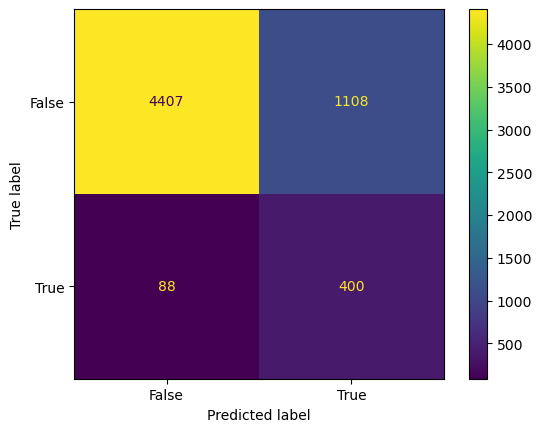

In [102]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,clf_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False,True])
cm_display.plot()
print("Confusion Matrix")
plt.show()

### PRECISION SCORE

The precision score of  0.8196 indicates that the classfication model achieved an accuracy of 81.96% on the test data 

### ROC & AUC Curve

In [103]:
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score, roc_curve

#calulating the false positive rate, true positive , and AUC
fpr,tpr,thresholds = roc_curve(y_test,clf_pred)
auc = roc_auc_score(y_test,clf_pred)

#creating the ROC curve
roc_trace = go.Scatter(
             x = fpr,
             y = tpr,
             name = "ROC Curve",
             mode = "lines",
             line = dict(color = "green"))

#creating the digonal line
diag_trace = go.Scatter(
x = [0,1],
y = [0,1],
name = "Diagonal",
mode = "lines",
line = dict(color = "gray",dash = "dash"))

#creating the layout
layout = go.Layout(
title = "AUC & ROC Curve",
xaxis = dict(title = "False Positive Rate"),
yaxis = dict(title = "True Positive Rate"),
showlegend = True,)

#creating the figure
fig = go.Figure(data = [roc_trace,diag_trace],layout = layout)

#adding the AUC score to the plot
fig.add_annotation(
x = 0.5,
y = 0.1,
text = f"AUC = {auc:.4f}",
showarrow = False,
font = dict(size = 16),)

#show the plot
fig.update_layout(height=500, width=800)
fig.show()

An AUC score of 0.8094 implies that on average the model correctly ranks a randomly selected positive instance higher than a randomly selected negative instances about 80.94% of time . This indicates that the model has a satisfactory level of discrimination between classes

### Important predictor attributes which are indicators of churn

In [104]:
coef_df = pd.DataFrame({"Feature": x_train_res.columns, "Coefficient": classifier.coef_.flatten()})
coef_df

Feature  Coefficient
0                const     0.189334
1        roam_og_mou_7     5.511720
2     loc_og_t2m_mou_8   -12.979271
3         std_og_mou_7     5.641900
4         std_og_mou_8   -13.854131
5       total_ic_mou_8   -19.757513
6     total_rech_num_6     5.896446
7     total_rech_num_8   -11.371167
8     total_rech_amt_6     9.084948
9       max_rech_amt_8    -0.474384
10  last_day_rch_amt_8   -10.528924
11        monthly_2g_8    -6.847060
12         sachet_2g_8    -6.144824
13        monthly_3g_8   -11.581025

#### This attributes have inverse relationship with the churn, indicating the likelihood of churn 

- loc_og_t2m_mou_8
- std_og_mou_8
- total_ic_mou_8
- total_rech_num_8
- max_rech_amt_8
- last_day_rch_amt_8
- monthly_2g_8
- sachet_2g_8
- monthly_3g_8

#### With the above observations i can say that

- Individuals who engage in incoming calls and sustain longer conversational durations are less likelihood to churn
- Customers with standard and local call subscriptions and who enjoy longer conversations are less likely to leave.
- Customers who frequently recharge and show a preference for the 3G network are less likely to churn
- Customers who make frequent high-value recharges are less likely to churn
- Customers who opt for service plans with validity periods shorter than a month and utilize 2G networks are less likely to    churn


# Recommendations

- 1) Emphasize the advantages of standard and local call plans, especially those that encourage and facilitate longer conversations. Offer special packages or reward for Standard and Local Call Plans
- 2) Consider loyalty programs, special discounts, or bonus features for customers who consistently make high-value recharges.
- 3) Give Exclusive benefits for customers who prefer and use the 3G network
- 4) Highlight Short-Term Service Plans for 2G Users, Promote shorter validity service plans specifically designed for 2G network users